<a href="https://colab.research.google.com/github/pedromirsky/Calculo-Numerico/blob/main/FC2_prueba_soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sympy import *
import math
from numpy import linspace
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np
from sympy.plotting import plot
import matplotlib.cm as cm


In [232]:
# state Pic , Ca
# Tomo valores iniciales Pic(0) = Pic, Ca(0) = Ca --> (valores de la tabla)

# tiempo
t = Symbol("t")

# var de estado
Pic = Function("Pic")
Ca = Function("Ca")

#input
Pa = Function("Pa")
dPa_dt = Pa(t).diff()
Pvs = Function("Pvs")
Ii = Function("Ii")


# Constantes:
Can = 0.15
Ro = 526.3
Rpv = 1.24
Rf = 2380
kE = 0.11
kR = 49100
tau = 20
qn = 12.5
deltaCa1 = 0.75
deltaCa2 = 0.075
G = 1.5
#Pc = 25

#Pic = 9.5
#Ca = 0.15

##Pvs = 6
##Pa = 100
## Ii = ?



#Cic = 1/(kE * Pic)
#Va = Ca *(Pa-Pic)

#q = (Pa-Pc)/Ra
#q
Ii(t)

Ii(t)

In [233]:
# 1:

#CCa = {Ca(0):0.15}
#CPic = {Pic(0):9.5}
CI = {Pic(0):9.5, Ca(0):0.15}

#ecuacion = Eq(dPa_dt,434343)
#ecuacion
#dsolve(ecuacion,Pa(t))
#CI = {Pa(0):200}
#dsolve(ecuacion,Pa(t),ics = CI)

t = 5
# 2: ?
Pa(t), dPa_dt, Ii(t), Pvs(t)


(Pa(5), Derivative(Pa(t), t), Ii(5), Pvs(5))

In [234]:
#3
Va = Function("Va")
#ecuacionVa = Eq(Va(t),Ca(t)*(Pa(t)-Pic(t)))

# esto lo calculo con valores iniciales de Ca y Pic en (t=0) y el input en ese instante inicial Pa

Pa0 = 100
Pic0 = 9.5
Ca0 = 0.15

ecuacionVa = Eq(Va(t),Ca0*(Pa0-Pic0))


#dsolve(ecuacionVa,Va(t)) #,ics = CI  CI = {Pic(0):9.5, Ca(0):0.15}
ecuacionVa
Va_t= Ca0*(Pa0-Pic0)
Va_t

13.575

In [235]:
#4:
Ra = Function("Ra")
ecuacionRa = Eq(Ra(t),kR*(Can**2) / Va_t**2)
ecuacionRa
Ra_t = kR*(Can**2) / Va_t**2
Ra_t

5.994932999603187

In [236]:
#5
Pc = Function("Pc")

ecuacionPc = Eq(Pc(t),(Pa0*Rpv + Pic0*Ra_t)/(Rpv + Ra_t)) 
ecuacionPc

Pc_t = (Pa0*Rpv + Pic0*Ra_t)/(Rpv + Ra_t)
Pc_t

25.010855457286876

In [237]:
q = Function("q")
ecuacionq = Eq(q(t),(Pa0-Pc_t)/(Ra_t)) 
ecuacionq
q_t = (Pa0-Pc_t)/(Ra_t)
q_t

12.508754401037802

In [238]:
x = Function("x")
ecuacionx = Eq(x(t),(q_t-qn)/(qn)) 
ecuacionx
x_t = (q_t-qn)/(qn)
x_t

0.0007003520830241428

In [239]:
#7

deltaCa = 0
ko = 0
if (x_t < 0) :
  deltaCa = deltaCa1
  ko = deltaCa1/4
elif (x_t > 0):
     deltaCa = deltaCa2
     ko = deltaCa2/4


In [240]:
#7

omega = Function("σ")
import math
# omega(G*x((t)))
ecuacionOmega = (omega(G*x((t))),(  (Can + deltaCa/2) + (Can - deltaCa/2)  * exp(G*x_t/ko)  ) / (1+ exp(G*x_t/ko))  )
ecuacionOmega
omega_t = (  (Can + deltaCa/2) + (Can - deltaCa/2)  * exp(G*x_t/ko)  ) / (1+ exp(G*x_t/ko)) 
omega_t

0.148949746603481

In [241]:
# 8
t = Symbol("t")
dCa_dt = Ca(t).diff()
ecuacionddCa_dt = Eq(dCa_dt, (1/tau) * (-Ca(t) + omega_t) )
ecuacionddCa_dt
dCa_dt = (1/tau) * (-Ca(t) + omega_t) # aca es en función de Ca(t), más abajo de esta celda redefino esta variable con Ca(t) reemplazada
# uso valor inicial de Ca para obtener C1

CICa = {Ca(0):Ca0}
ecuacionCa_t= dsolve(ecuaciondCa_dt,Ca(t),ics = CICa)


ecuacionCa_t
tCa = 5 # si uso t no funciona como quiero
reemplazoCa_t = ecuacionCa_t.subs(t,tCa)
# Paso del tipo sympy.core.relational.Equality a float (o algo numérico)
type(Ca_t) 
Ca_t = reemplazoCa_t.rhs

Ca_t

dCa_dt = (1/tau) * (-Ca_t + omega_t)
dCa_dt

-4.08969083816199e-5

In [242]:
# 9:
Pvs = 6
Ii_t = 0
Pa_t = 100
dPa_dt = 0

dPic_dt = Pic(t).diff()
ecuaciondPi_dt = Eq(dPic_dt, ( (kE * Pic(t))/(1+Ca_t*kE*Pic(t)) ) * ( Ca_t * dPa_dt + dCa_dt * (Pa_t - Pic(t)) + (( Pc_t - Pic(t))/Rf) - ((Pic(t)-Pvs)/(Ro)) + Ii_t )  )
ecuaciondPi_dt

# dsolve(ecuaciondPi_dt,Pic(t)) --> runge kutta?
# dsolve(ecuacionVa,Va(t)) #,ics = CI  CI = {Pic(0):9.5, Ca(0):0.15}

Eq(Derivative(Pic(t), t), 0.11*(0.0178194139692777 - 0.00227932816055532*Pic(t))*Pic(t)/(0.0164744453248224*Pic(t) + 1))

In [ ]:
CIPic = {Pic(0): 9.5}
ecuacionPic_t= dsolve(ecuaciondPi_dt,Pic(t),ics = CIPic)

In [215]:
def df(t,Pic):
  #return 5*Pic
  return (0.11*Pic*(0.0178194139692777-0.00227932816055532*Pic)) / (0.0164744453248224*Pic+1)

-0.0046973860958469385

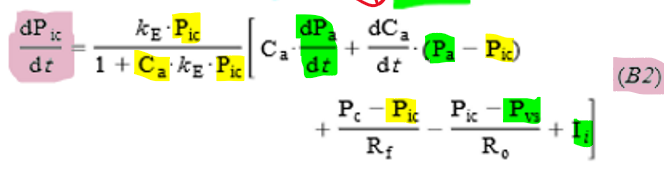

In [246]:
def RungeKutta4(df,x,y,xF,N):
    X = []
    Y = []
    X.append(x)
    Y.append(y)
    h = float(xF-x)/N
    for i in range(N):
      k1 = df(x,y)
      k2 = df(x+0.5*h,y +0.5*k1*h)
      k3 = df(x+0.5*h,y +0.5*k2*h)
      k4 = df(x+h,y + k3*h)
      y = y + (1/6)*(k1+2*k2+2*k3+k4)*h
      x = x+h
      X.append(x)
      Y.append(y)
    return (X,Y)

